In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import skew
from sklearn.utils import resample


In [ ]:
def simulate(A=1, B=1, C=10, D=1000):
  W = np.random.normal(0,1,D)
  X = W+np.random.normal(0,B,D)
  Y = A*X-W+np.random.normal(0,C,D)
  return Y, X, W

## Question 1

Which of the following is closest to the probability of detecting a nonzero effect of ﻿X﻿ on ﻿Y﻿ (the t-value of ﻿X﻿ is greater in absolute value than about 1.96) given A = 1, B = 1, C = 10, D = 1000? Include W in the regression.

In [18]:
def get_t_value(Y, X, W):
    df = pd.DataFrame({'Y': Y, 'X': X, 'W': W})
    X_mat = sm.add_constant(df[['X', 'W']])
    model = sm.OLS(df['Y'], X_mat).fit()
    t_value_X = model.tvalues['X']
    return t_value_X

In [19]:
num_simulations=1000
A=1
B=1
C=10
D=1000

count_significant = 0
for _ in range(num_simulations):
    Y, X, W = simulate(A, B, C, D)
    t_val = get_t_value(Y, X, W)
    if abs(t_val) > 1.96:
        count_significant += 1
probability = count_significant / num_simulations

In [ ]:
print(f"Estimated probability of detecting nonzero X effect: {probability:.3f}")

Estimated probability of detecting nonzero X effect: 0.887


## Question 2

Which of the following is closest to the skew of the estimate in that case? (You can compute this using scipy.)

In [17]:
betas = []
for _ in range(num_simulations):
    Y, X, W = simulate(A, B, C, D)
    df = pd.DataFrame({'Y': Y, 'X': X, 'W': W})
    X_mat = sm.add_constant(df[['X', 'W']])
    model = sm.OLS(df['Y'], X_mat).fit()
    beta_X = model.params['X']
    betas.append(beta_X)

beta_skewness = skew(np.array(betas))
print(f"Skewness of beta_X estimates: {beta_skewness:.3f}")


Skewness of beta_X estimates: 0.083


## Question 3

With A = 1, C = 10, D = 1,000, what value of B is needed to detect that the Data Generating Process (DGP) has a nonzero coefficient for X about 50% of the time? (Choose the closest value.)

In [ ]:
# Estimate detection probability for a given B
def estimate_probability(B, num_simulations=1000, A=1, C=10, D=1000):
    count_significant = 0
    for _ in range(num_simulations):
        Y, X, W = simulate(A, B, C, D)
        t_val = get_t_value(Y, X, W)
        if abs(t_val) > 1.96:
            count_significant += 1
    probability = count_significant / num_simulations
    return probability

In [24]:
# Search over B grid
B_values = np.linspace(0.2, 2.0, 20)  # test B from 0.2 to 2.0
results = []

for B in B_values:
    prob = estimate_probability(B)
    results.append((B, prob))
    print(f"B = {B:.2f}, detection probability = {prob:.3f}")

B = 0.20, detection probability = 0.132
B = 0.29, detection probability = 0.138
B = 0.39, detection probability = 0.222
B = 0.48, detection probability = 0.350
B = 0.58, detection probability = 0.494
B = 0.67, detection probability = 0.550
B = 0.77, detection probability = 0.704
B = 0.86, detection probability = 0.764
B = 0.96, detection probability = 0.868
B = 1.05, detection probability = 0.898
B = 1.15, detection probability = 0.968
B = 1.24, detection probability = 0.970
B = 1.34, detection probability = 0.990
B = 1.43, detection probability = 1.000
B = 1.53, detection probability = 0.992
B = 1.62, detection probability = 1.000
B = 1.72, detection probability = 1.000
B = 1.81, detection probability = 1.000
B = 1.91, detection probability = 1.000
B = 2.00, detection probability = 1.000


In [25]:
results = np.array(results)
closest_idx = np.argmin(np.abs(results[:,1] - 0.5))
best_B, best_prob = results[closest_idx]

print(f"\n✅ Estimated B for ~50% detection: {best_B:.3f} (prob = {best_prob:.3f})")


✅ Estimated B for ~50% detection: 0.579 (prob = 0.494)


## Question 4

With B = 1, C = 10, D = 100 (note the different value of D), what value of A is needed to detect that the DGP has a nonzero coefficient for X about 50% of the time? (Choose the closest value.) 

In [26]:
# Estimate detection probability at given A
def estimate_probability(A, num_simulations=1000, B=1, C=10, D=100):
    count_significant = 0
    for _ in range(num_simulations):
        Y, X, W = simulate(A, B, C, D)
        t_val = get_t_value(Y, X, W)
        if abs(t_val) > 1.96:
            count_significant += 1
    probability = count_significant / num_simulations
    return probability


In [27]:
# Search over A grid
A_values = np.linspace(0.5, 3.5, 20)  # test A from 0.5 to 3.5
results = []

print("\nSearching for A giving ~50% detection rate...\n")
for A in A_values:
    prob = estimate_probability(A)
    results.append((A, prob))
    print(f"A = {A:.2f}, detection probability = {prob:.3f}")



Searching for A giving ~50% detection rate...

A = 0.50, detection probability = 0.088
A = 0.66, detection probability = 0.097
A = 0.82, detection probability = 0.141
A = 0.97, detection probability = 0.162
A = 1.13, detection probability = 0.196
A = 1.29, detection probability = 0.249
A = 1.45, detection probability = 0.299
A = 1.61, detection probability = 0.331
A = 1.76, detection probability = 0.405
A = 1.92, detection probability = 0.466
A = 2.08, detection probability = 0.531
A = 2.24, detection probability = 0.620
A = 2.39, detection probability = 0.643
A = 2.55, detection probability = 0.734
A = 2.71, detection probability = 0.755
A = 2.87, detection probability = 0.789
A = 3.03, detection probability = 0.830
A = 3.18, detection probability = 0.876
A = 3.34, detection probability = 0.897
A = 3.50, detection probability = 0.941


In [28]:
# Find A closest to 0.5 detection probability
results = np.array(results)
closest_idx = np.argmin(np.abs(results[:,1] - 0.5))
best_A, best_prob = results[closest_idx]

print(f"\n✅ Estimated A for ~50% detection: {best_A:.3f} (prob = {best_prob:.3f})")



✅ Estimated A for ~50% detection: 2.079 (prob = 0.531)


## Homework Reflection 

1. Write some code that will use a simulation to estimate the standard deviation of the coefficient when there is heteroskedasticity.  
Compare these standard errors to those found via statsmodels OLS or a similar linear regression model.




In [3]:
# Simulation parameters
np.random.seed(42)
n = 100  # observations per simulation
num_simulations = 1000  # number of simulations
true_beta = 2.0

# Store estimated coefficients and standard errors
ols_betas = []
ols_se = []
robust_se = []

for _ in range(num_simulations):
    # Independent variable
    x = np.random.uniform(0, 10, n)
    X = sm.add_constant(x)

    # Heteroskedastic errors: variance increases with x
    errors = np.random.normal(0, 0.5 * x, n)
    y = true_beta * x + errors

    # Fit OLS model
    model = sm.OLS(y, X).fit()
    ols_betas.append(model.params[1])
    ols_se.append(model.bse[1])
    robust_se.append(model.get_robustcov_results(cov_type='HC1').bse[1])

# Convert to arrays
ols_betas = np.array(ols_betas)
ols_se = np.array(ols_se)
robust_se = np.array(robust_se)


In [4]:
print("Empirical SD of beta estimates:", np.std(ols_betas))
print("Mean OLS standard error:", np.mean(ols_se))
print("Mean robust (HC1) standard error:", np.mean(robust_se))


Empirical SD of beta estimates: 0.1084477371671363
Mean OLS standard error: 0.1000197820608326
Mean robust (HC1) standard error: 0.10781031982290427


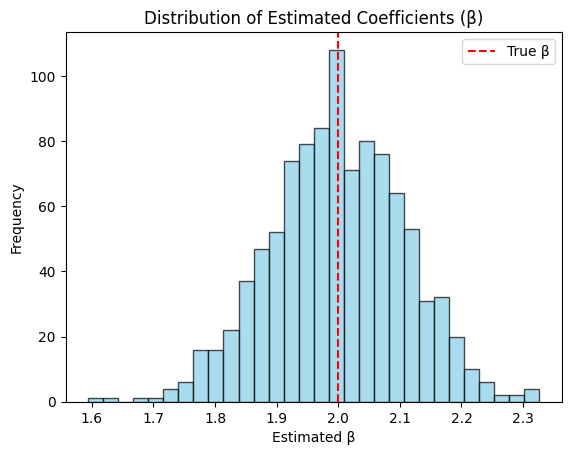

In [5]:
import matplotlib.pyplot as plt

plt.hist(ols_betas, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(true_beta, color='red', linestyle='--', label='True β')
plt.title("Distribution of Estimated Coefficients (β)")
plt.xlabel("Estimated β")
plt.ylabel("Frequency")
plt.legend()
plt.show()


2. Write some code that will use a simulation to estimate the standard deviation of the coefficient when errors are highly correlated / non-independent.
Compare these standard errors to those found via statsmodels OlS or a similar linear regression model.

    Show that if the correlation between coefficients is high enough, then the estimated standard deviation of the coefficient, using bootstrap errors, might not match that found by a full simulation of the Data Generating Process.  (This can be fixed if you have a huge amount of data for the bootstrap simulation.)

In [7]:
# Parameters
np.random.seed(42)
n = 100  # observations per simulation
num_simulations = 1000
true_beta = 1.5
rho = 0.9  # high autocorrelation in errors

# Storage
ols_betas = []
ols_se = []
bootstrap_se = []

def generate_ar1_errors(n, rho):
    e = np.zeros(n)
    e[0] = np.random.normal()
    for t in range(1, n):
        e[t] = rho * e[t-1] + np.random.normal()
    return e

for _ in range(num_simulations):
    x = np.random.normal(0, 1, n)
    X = sm.add_constant(x)

    # AR(1) errors
    errors = generate_ar1_errors(n, rho)
    y = true_beta * x + errors

    # Fit OLS
    model = sm.OLS(y, X).fit()
    ols_betas.append(model.params[1])
    ols_se.append(model.bse[1])

    # Bootstrap SE via residual resampling
    residuals = model.resid
    boot_betas = []
    for _ in range(200):  # bootstrap samples
        boot_resid = resample(residuals)
        y_boot = model.fittedvalues + boot_resid
        boot_model = sm.OLS(y_boot, X).fit()
        boot_betas.append(boot_model.params[1])
    bootstrap_se.append(np.std(boot_betas))

# Convert to arrays
ols_betas = np.array(ols_betas)
ols_se = np.array(ols_se)
bootstrap_se = np.array(bootstrap_se)


In [8]:
print("Empirical SD of beta estimates:", np.std(ols_betas))
print("Mean OLS standard error:", np.mean(ols_se))
print("Mean bootstrap standard error:", np.mean(bootstrap_se))

Empirical SD of beta estimates: 0.20892838508255415
Mean OLS standard error: 0.203731169712582
Mean bootstrap standard error: 0.20101100494476049


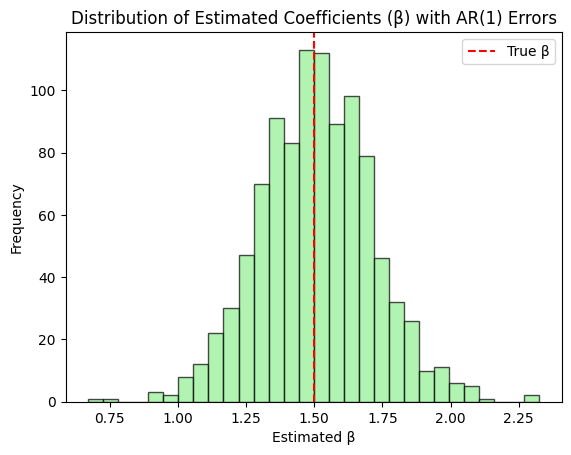

In [9]:
plt.hist(ols_betas, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(true_beta, color='red', linestyle='--', label='True β')
plt.title("Distribution of Estimated Coefficients (β) with AR(1) Errors")
plt.xlabel("Estimated β")
plt.ylabel("Frequency")
plt.legend()
plt.show()
